In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [20]:
import pickle
with open("marks_model.pkl", "wb") as f:
    pickle.dump(model, f)    

In [22]:
print("✓ Model saved as marks_model.pkl")

✓ Model saved as marks_model.pkl


In [3]:
import pandas as pd
data = pd.read_csv('student_data.csv')

In [4]:
print(data.head())


   Study_Hours  Sleep_Hours  Attendance  Marks
0            4            7          85     76
1            6            6          90     82
2            2            8          70     60
3            5            5          95     88
4            7            6          80     85


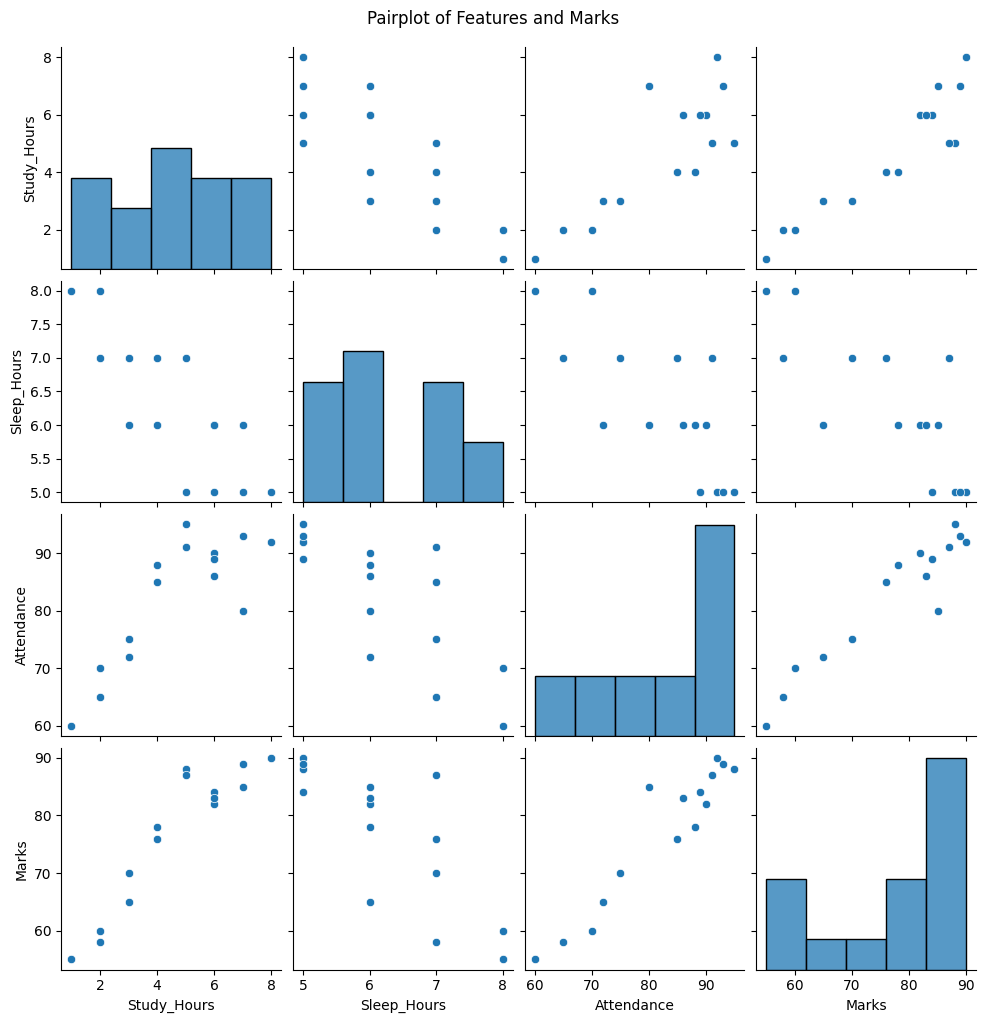

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)
plt.suptitle("Pairplot of Features and Marks", y=1.02)
plt.show()


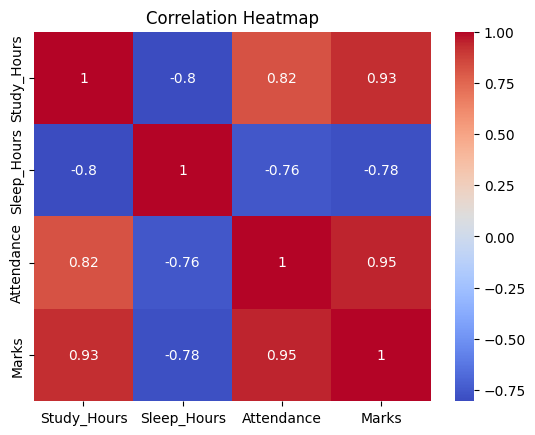

In [8]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [9]:
X = data[['Study_Hours', 'Sleep_Hours', 'Attendance']]
y = data['Marks']



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [13]:
y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 1.0927137288923832
R² Score: 0.9819882352380377


In [16]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [2.73682001 0.72303783 0.66014681]
Intercept: 5.5452164840046265


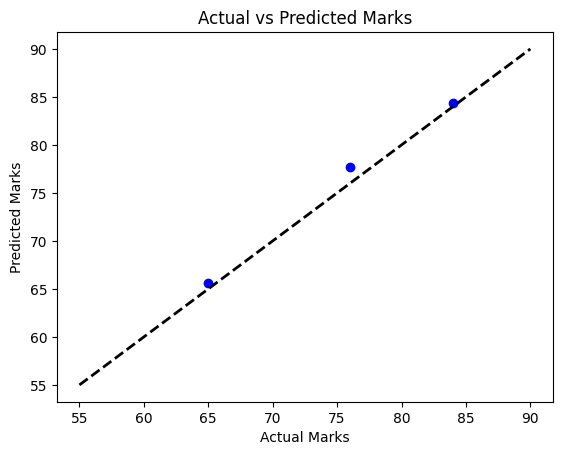

In [17]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks")
plt.show()


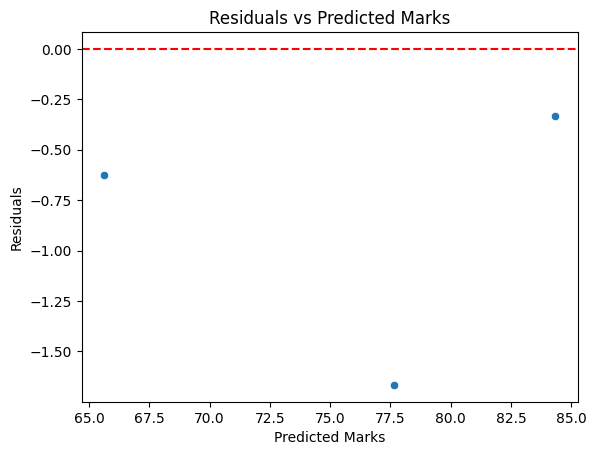

In [18]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Marks")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Marks")
plt.show()